In [86]:
%load_ext autoreload
%autoreload 2

from utils import *
from fdaf import *
import IPython.display as ipd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
#h = np.zeros(1200)
#h[500] = 1
h = None
signal_microphone, signal_loudspeaker, impulse_response, rate = generate_signals(h)

In [54]:
N = 500

# finish_index = 4 * rate # stop after 4 seconds
# signal_error, estimated_impulse_response = NLMS(signal_loudspeaker, signal_microphone, N, 0.5, 0.000001, freeze_index=finish_index)
signal_error, estimated_impulse_response = NLMS(signal_loudspeaker, signal_microphone, N, 0.5, 0.000001)

(2400,)


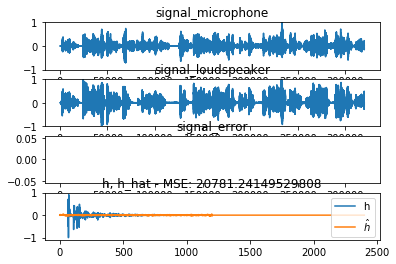

In [72]:
print(h.shape)
plot_signals(signal_microphone, signal_loudspeaker, impulse_response, signal_error, h, N)

In [64]:
# Loudspeaker signal
ipd.Audio(signal_loudspeaker.reshape(-1), rate=rate)

In [101]:
# Microphone signal
ipd.Audio(signal_microphone.reshape(-1), rate=rate)

In [7]:
# Filtered signal
#ipd.Audio(signal_error.reshape(-1), rate=rate)

## Test BFDF

In [93]:
x = get_shifted_blocks(signal_loudspeaker,1024,512)
h = get_shifted_blocks(impulse_response,1024,512)
X = fft.fft(x)
H = fft.fft(h)
y = BFDF(X,H,512)
print(X.shape,H.shape,y.shape)
ipd.Audio(y.T,rate=rate)

(626, 1024) (4, 1024) (320512, 1)


## Test FDAF_OS

Block:  0
Block:  1
Block:  2
Block:  3
Block:  4
Block:  5
Block:  6
Block:  7
Block:  8
Block:  9
Block:  10
Block:  11
Block:  12
Block:  13
Block:  14
Block:  15
Block:  16
Block:  17
Block:  18
Block:  19
Block:  20
Block:  21
Block:  22
Block:  23
Block:  24
Block:  25
Block:  26
Block:  27
Block:  28
Block:  29
Block:  30
Block:  31
Block:  32
Block:  33
Block:  34
Block:  35
Block:  36
Block:  37
Block:  38
Block:  39
Block:  40
Block:  41
Block:  42
Block:  43
Block:  44
Block:  45
Block:  46
Block:  47
Block:  48
Block:  49
Block:  50
Block:  51
Block:  52
Block:  53


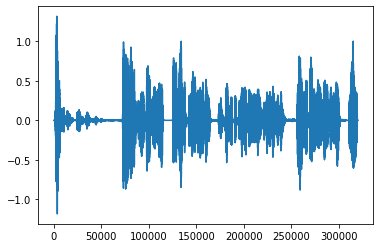

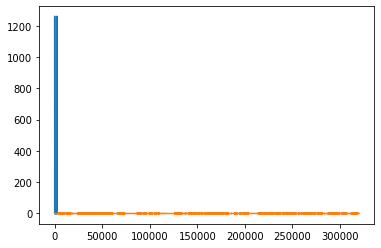

In [97]:
fi = np.asarray([[4,20]])*2*rate
#fi = None
e,y,H,p = FDAF_OS(signal_loudspeaker,signal_microphone, freeze_index=fi)

plt.plot(e.ravel())
plt.figure()
plt.plot(p.T)
plt.plot(y)
ipd.Audio(y.ravel(),rate=rate)

In [100]:
ipd.Audio(e.ravel(),rate=rate)

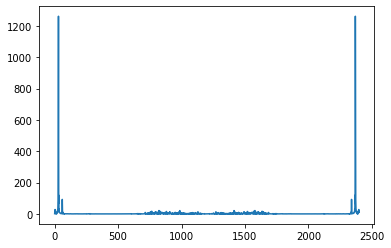

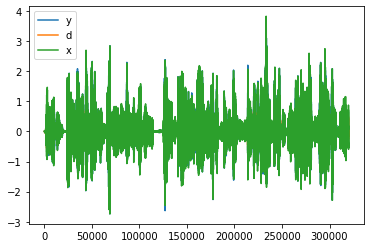

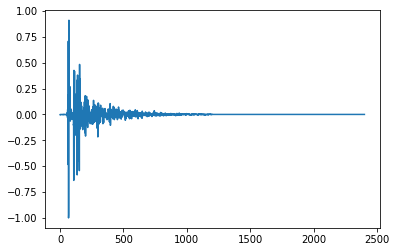

In [98]:
plt.plot(abs(p).ravel())
plt.figure()
plt.plot(y.ravel())
plt.plot(signal_loudspeaker.ravel())
plt.plot(signal_microphone.ravel())
plt.legend(['y','d','x'],loc='upper left')


plt.figure()
h = fft.ifft(H).real.ravel()
plt.plot(h)
#plt.plot(impulse_response)
plt.show()